<a href="https://colab.research.google.com/github/cardonasebastian/MNA_PROYECTO/blob/main/Avance3/Baseline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INSTITUTO TECNOLÓGICO DE ESTUDIOS SUPERIORES DE MONTERREY

# Maestría en Inteligencia Artificial Aplicada

# TC5035.10 Proyecto Integrador:

# Optimización Estratégica de la Seguridad Vial: Implementación de un Modelo de Clasificación Avanzado para la Evaluación y Mejora de Hábitos de Conducción


#Fase 3.
# Avance 3. Baseline.

#A01687530 - Fernando Sebastian Sanchez Cardona
#A01793670 - Bryan Alvarado Cruz
# A01793832 - Fernando Anaya Delgado

####¿Qué algoritmo se puede utilizar como baseline para predecir las variables objetivo?
####¿Se puede determinar la importancia de las características para el modelo generado? Recuerden que incluir características irrelevantes puede afectar negativamente el rendimiento del modelo y aumentar la complejidad sin beneficios sustanciales.
####¿El modelo está sub/sobreajustando los datos de entrenamiento?
####¿Cuál es la métrica adecuada para este problema de negocio?
####¿Cuál debería ser el desempeño mínimo a obtener?

## Leer datos de nuestra capa Gold

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [62]:
import pandas as pd
file_path = '/content/drive/My Drive/MNA_PI/Gold/safety.csv'
df_safety = pd.read_csv(file_path)
df_safety

,unique_id,date,name,maxSpeed,hard_acceleration,harsh_braking,harsh_cornering,seat_belt,speeding,excessive_speeding
0,74606d62-df5f-4cf4-9ba5-262c1c64731f,2024-05-17,1,112,0,0,0,0,0,0
1,5414fa29-5a8b-402e-ba0c-65877396a103,2024-05-17,2021,114,0,0,0,0,0,0
2,02b64477-38b6-47d4-ab22-fe50d5253175,2024-05-17,2022,112,0,1,0,0,0,0
3,23ef12be-25c4-43cf-9489-5b2345fe415a,2024-05-17,2023,12,0,0,0,0,2,0
4,64adf191-c891-43d9-9ba0-3819652e285f,2024-05-17,2024,10,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
4337,4635d0c2-affb-4a62-bc95-5e92560034c0,2024-04-27,2212,122,0,12,2,7,40,3
4338,1568b4e9-172e-49e7-a12c-d3f964213804,2024-04-27,2213,0,0,0,0,0,0,0
4339,b75f5269-c9b8-41ce-b8c5-1764e18b5be7,2024-04-27,2214,116,0,0,0,0,0,0
4340,ebbec643-0dbd-4350-903e-e197e7c81284,2024-04-27,2215,118,0,2,0,0,2,0


## BaseLine se tiene en cuenta el modelo de Regresion Logistica

### Se importan las librerias a utilizar

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

### Se lee el dataset safely y se limpia con variables no caracteristicas

In [67]:


# Cargar el dataset
df = df_safety

# Eliminar columnas innecesarias
df_limpio = df.drop(columns=['unique_id', 'date', 'name'])

# Crear una variable de riesgo basada en comportamientos de conducción
df_limpio['puntuacion_riesgo'] = df_limpio[['hard_acceleration', 'harsh_braking', 'harsh_cornering', 'seat_belt', 'speeding', 'excessive_speeding']].sum(axis=1)



### Se define la funcion para el clasificar el tipo de conductor

In [68]:
# Definir la variable objetivo basada en la puntuación de riesgo
def clasificar_conductor(puntuacion_riesgo):
    if puntuacion_riesgo == 0:
        return 0  # Buen conductor
    elif puntuacion_riesgo <= 3:
        return 1  # Conductor regular
    else:
        return 2  # Mal conductor

df_limpio['clase_conductor'] = df_limpio['puntuacion_riesgo'].apply(clasificar_conductor)

# Eliminar la columna de puntuación de riesgo
df_limpio = df_limpio.drop(columns=['puntuacion_riesgo'])



### Se definine las variables objetivo

In [69]:
# Definir características y objetivo
X = df_limpio.drop(columns=['clase_conductor'])
y = df_limpio['clase_conductor']


### Se dividen los datos para entranamiento y test

In [70]:

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)



### Normalizacion de las variables caracteristicas numericas

In [71]:
# Normalizar las características numéricas
escalador = StandardScaler()
X_train_escalado = escalador.fit_transform(X_train)
X_test_escalado = escalador.transform(X_test)



### Se entrena al modelo con regresion logistica

In [72]:
# Entrenar el modelo de regresión logística
modelo = LogisticRegression(max_iter=10, random_state=42, multi_class='ovr')
modelo.fit(X_train_escalado, y_train)



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=10, multi_class='ovr', random_state=42)

### Predecir y Evaluacion del Modelo.

In [73]:
# Predecir y evaluar el modelo
y_pred = modelo.predict(X_test_escalado)
precision = accuracy_score(y_test, y_pred)

precision

0.9459148446490219

### Se agrego funcion para la curva de aprendizaje con validación cruzada

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Validación cruzada - Accuracia:  [0.94100719 0.93956835 0.95395683 0.94956772 0.95533141]
Promedio:  0.947886301909481


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

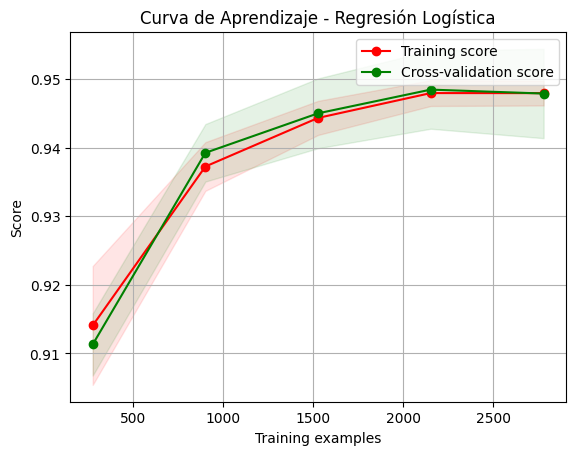

Reporte de Clasificación (Entrenamiento):
               precision    recall  f1-score   support

           0       0.95      0.93      0.94       989
           1       0.69      0.58      0.63       253
           2       0.97      1.00      0.99      2231

    accuracy                           0.95      3473
   macro avg       0.87      0.84      0.85      3473
weighted avg       0.95      0.95      0.95      3473

Reporte de Clasificación (Prueba):
               precision    recall  f1-score   support

           0       0.95      0.92      0.94       247
           1       0.66      0.60      0.63        63
           2       0.97      1.00      0.98       559

    accuracy                           0.95       869
   macro avg       0.86      0.84      0.85       869
weighted avg       0.94      0.95      0.94       869

Matriz de Confusión (Entrenamiento):
 [[ 924   65    0]
 [  44  148   61]
 [   2    1 2228]]
Matriz de Confusión (Prueba):
 [[227  20   0]
 [  9  38  16]
 [  2

In [74]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score, learning_curve

# Función para generar curvas de aprendizaje
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Entrenar el modelo con validación cruzada
cv_scores = cross_val_score(modelo, X_train_escalado, y_train, cv=5, scoring='accuracy')

print("Validación cruzada - Accuracia: ", cv_scores)
print("Promedio: ", np.mean(cv_scores))

# Curvas de aprendizaje
plot_learning_curve(modelo, "Curva de Aprendizaje - Regresión Logística", X_train_escalado, y_train, cv=5)
plt.show()

# Predicciones en el conjunto de prueba
y_pred_test = modelo.predict(X_test_escalado)
y_pred_train = modelo.predict(X_train_escalado)

# Métricas de evaluación
print("Reporte de Clasificación (Entrenamiento):\n", classification_report(y_train, y_pred_train))
print("Reporte de Clasificación (Prueba):\n", classification_report(y_test, y_pred_test))

# Matrices de confusión
print("Matriz de Confusión (Entrenamiento):\n", confusion_matrix(y_train, y_pred_train))
print("Matriz de Confusión (Prueba):\n", confusion_matrix(y_test, y_pred_test))


## 1.	¿Qué algoritmo se puede utilizar como baseline para predecir las variables objetivo?
### Un algoritmo comúnmente utilizado como baseline es Logistic Regression (Regresión Logística). Es simple, fácil de interpretar y proporciona un punto de referencia inicial para evaluar modelos más complejos.En este caso se implemento una Regresion Logistica para los datos proporcionados
##2.	¿Se puede determinar la importancia de las características para el modelo generado?
###	Se puede determinar la importancia de las características en la Regresión Logística mediante los coeficientes del modelo. Los coeficientes indican la relación entre cada característica y la variable objetivo. Características con coeficientes pequeños pueden considerarse menos importantes.
##3.	¿El modelo está sub/sobreajustando los datos de entrenamiento?
###	Para determinar si hay sub/sobreajuste, se pueden observar las curvas de aprendizaje y comparar las métricas de rendimiento en los conjuntos de entrenamiento y prueba. Es este caso se realizo una validacion cruzada para verificar la curva de aprendizaje del modelo lo cual no esta sobreajustado

## 4. ¿Cuál es la métrica adecuada para este problema de negocio?
###	Dado que estamos tratando con una clasificación multinomial y potencialmente clases desbalanceadas, las métricas adecuadas podrían ser:
###	•	F1-Score: Balance
###  entre precisión y recall.
### - Precision y Recall: Para evaluar cómo el modelo maneja falsos positivos y falsos negativos, respectivamente.
### - Matriz de Confusión: Para entender el rendimiento del modelo en cada clase.

## 5.	¿Cuál debería ser el desempeño mínimo a obtener?
###	El desempeño mínimo depende del contexto del negocio en este caso un valor aceptable para la empresa es un 80% de presicion como objetivo inicial, podemos considerar esto como el umbral mínimo. Idealmente, también deberíamos buscar un F1-Score equilibrado para todas las clases.


## Conclusion

###El objetivo de este apartado fue construir un modelo de clasificación para evaluar y clasificar a los conductores en tres categorías: buenos, regulares y malos. Utilizando un enfoque basado en características de comportamiento de conducción. Y como resultado del baseline superó las expectativas iniciales con una precisión del 94.71%, proporcionando una base sólida para futuras mejoras. .
